# Data Preprocessing and Feature Selection 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'features.csv', 'drive', 'sample_data']


removing missing values, interpolation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset national health/demographic.csv")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [ ]:
df.shape

(10175, 47)

In [ ]:
pd.options.display.max_columns = 200
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [ ]:
#info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   SDDSRVYR  10175 non-null  int64  
 2   RIDSTATR  10175 non-null  int64  
 3   RIAGENDR  10175 non-null  int64  
 4   RIDAGEYR  10175 non-null  int64  
 5   RIDAGEMN  673 non-null    float64
 6   RIDRETH1  10175 non-null  int64  
 7   RIDRETH3  10175 non-null  int64  
 8   RIDEXMON  9813 non-null   float64
 9   RIDEXAGM  4213 non-null   float64
 10  DMQMILIZ  6261 non-null   float64
 11  DMQADFC   543 non-null    float64
 12  DMDBORN4  10175 non-null  int64  
 13  DMDCITZN  10171 non-null  float64
 14  DMDYRSUS  1908 non-null   float64
 15  DMDEDUC3  2803 non-null   float64
 16  DMDEDUC2  5769 non-null   float64
 17  DMDMARTL  5769 non-null   float64
 18  RIDEXPRG  1309 non-null   float64
 19  SIALANG   10175 non-null  int64  
 20  SIAPROXY  10174 non-null  fl

counting non missing values

In [ ]:
df.count()

SEQN        10175
SDDSRVYR    10175
RIDSTATR    10175
RIAGENDR    10175
RIDAGEYR    10175
RIDAGEMN      673
RIDRETH1    10175
RIDRETH3    10175
RIDEXMON     9813
RIDEXAGM     4213
DMQMILIZ     6261
DMQADFC       543
DMDBORN4    10175
DMDCITZN    10171
DMDYRSUS     1908
DMDEDUC3     2803
DMDEDUC2     5769
DMDMARTL     5769
RIDEXPRG     1309
SIALANG     10175
SIAPROXY    10174
SIAINTRP    10175
FIALANG     10054
FIAPROXY    10054
FIAINTRP    10054
MIALANG      7311
MIAPROXY     7312
MIAINTRP     7313
AIALANGA     6317
DMDHHSIZ    10175
DMDFMSIZ    10175
DMDHHSZA    10175
DMDHHSZB    10175
DMDHHSZE    10175
DMDHRGND    10175
DMDHRAGE    10175
DMDHRBR4     9878
DMDHREDU     9881
DMDHRMAR    10052
DMDHSEDU     5342
WTINT2YR    10175
WTMEC2YR    10175
SDMVPSU     10175
SDMVSTRA    10175
INDHHIN2    10042
INDFMIN2    10052
INDFMPIR     9390
dtype: int64

In [ ]:
df_missing=df.isna()
df_missing.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
len(df)

10175

In [ ]:
#percentage
x=df.isna().mean().round(3)*100
x.sort_values()

SEQN         0.0
SIAINTRP     0.0
SIAPROXY     0.0
SIALANG      0.0
DMDHHSZA     0.0
DMDHHSZB     0.0
DMDHHSZE     0.0
DMDHRGND     0.0
DMDHRAGE     0.0
DMDCITZN     0.0
DMDBORN4     0.0
DMDHHSIZ     0.0
WTINT2YR     0.0
WTMEC2YR     0.0
SDMVPSU      0.0
RIDRETH3     0.0
RIDRETH1     0.0
SDMVSTRA     0.0
RIDAGEYR     0.0
RIAGENDR     0.0
RIDSTATR     0.0
SDDSRVYR     0.0
DMDFMSIZ     0.0
DMDHRMAR     1.2
FIAPROXY     1.2
INDFMIN2     1.2
FIALANG      1.2
FIAINTRP     1.2
INDHHIN2     1.3
DMDHREDU     2.9
DMDHRBR4     2.9
RIDEXMON     3.6
INDFMPIR     7.7
MIALANG     28.1
MIAINTRP    28.1
MIAPROXY    28.1
AIALANGA    37.9
DMQMILIZ    38.5
DMDMARTL    43.3
DMDEDUC2    43.3
DMDHSEDU    47.5
RIDEXAGM    58.6
DMDEDUC3    72.5
DMDYRSUS    81.2
RIDEXPRG    87.1
RIDAGEMN    93.4
DMQADFC     94.7
dtype: float64

diet csv

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/dataset national health/diet.csv")
df1.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,

In [ ]:
df1.shape

(9813, 168)

In [ ]:
pd.set_option('display.max_rows', 500)
x =df1.isna().mean().round(3)*100
y=x
y.sort_values()


SEQN          0.0
WTDRD1        0.0
DR1DRSTZ      0.0
DR1LANG      10.4
DR1EXMER     10.5
DR1.300      10.5
DR1DAY       10.5
DRQSDIET     10.5
DBQ095Z      10.5
DR1TWS       10.5
DRQSPREP     10.5
DR1STY       10.5
DR1DBIH      11.3
DR1TNUMF     11.7
DR1.330Z     11.7
DR1BWATZ     11.7
DR1.320Z     11.7
DRDINT       11.7
DRABF        11.7
WTDR2D       11.7
DR1MNRSP     11.8
DR1HELPD     12.1
DR1TTHEO     13.1
DR1TCAFF     13.1
DR1TSELE     13.1
DR1TPOTA     13.1
DR1TSODI     13.1
DR1TCOPP     13.1
DR1TZINC     13.1
DR1TMAGN     13.1
DR1TPHOS     13.1
DR1TCALC     13.1
DR1TVK       13.1
DR1TVD       13.1
DR1TVC       13.1
DR1TB12A     13.1
DR1TALCO     13.1
DR1TIRON     13.1
DR1TMOIS     13.1
DR1TM201     13.1
DR1TS060     13.1
DR1TP226     13.1
DR1TP225     13.1
DR1TP205     13.1
DR1TP204     13.1
DR1TP184     13.1
DR1TP183     13.1
DR1TP182     13.1
DR1TS040     13.1
DR1TM221     13.1
DR1TM181     13.1
DR1TM161     13.1
DR1TS180     13.1
DR1TS160     13.1
DR1TS120     13.1
DR1TS100  

In [ ]:
df2= pd.read_csv("/content/drive/MyDrive/dataset national health/labs.csv")

In [ ]:
df2['LBXTC'].isna().sum()

2189

In [ ]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(10175, 47)
(9813, 168)
(9813, 424)


In [ ]:
diet = df1[df1.columns[df1.isna().mean() < 0.7]]
diet
#updated diet.csv by dropping columns having missing values greater than 70

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350B,DRD350C,DRD350D,DRD350E,DRD350F,DRD350G,DRD350H,DRD350HQ,DRD350I,DRD350J,DRD350K,DRD360,DRD370A,DRD370B,DRD370C,DRD370D,DRD370E,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,2.0,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.00,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,2.0,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.00,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,1.0,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.00,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,2.0,19.0,1490.0,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,187.0,2.16,0.00,515.0,545.0,20.0,237.0,223.0,0.0,583.0,1.407,2.186,21.903,1.807,275.0,126.0,148.0,363.0,268.9,8.76,1.55,93.0,9.9,31.5,1521.0,1495.0,183.0,14.19,13.84,0.542,2745.0,2088.0,91.2,0.0,0.0,0.0,980.45,0.265,0.201,0.213,0.385,0.907,1.979,13.051,5.384,1.009,7.771,0.203,0.003,8.466,0.948,0.002,0.089,0.007,0.006,0.004,2.0,225.0,225.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,1.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41.0,53.17,0.00,738.0,863.0,0.0,1476.0,0.0,0.0,0.0,1.484,1.720,15.857,2.757,390.0,389.0,1.0,667.0,218.1,8.30,8.29,236.5,23.5,126.0,1410.0,1182.0,396.0,17.72,17.73,1.984,797.0,1445.0,68.7,24.0,0.0,0.0,

In [ ]:
diet.isna().sum()

SEQN           0
WTDRD1         0
WTDR2D      1152
DR1DRSTZ       0
DR1EXMER    1030
DRABF       1152
DRDINT      1152
DR1DBIH     1107
DR1DAY      1030
DR1LANG     1016
DR1MNRSP    1160
DR1HELPD    1185
DBQ095Z     1030
DBD100      4414
DRQSPREP    1030
DR1STY      1030
DRQSDIET    1030
DR1TNUMF    1152
DR1TKCAL    1282
DR1TPROT    1282
DR1TCARB    1282
DR1TSUGR    1282
DR1TFIBE    1282
DR1TTFAT    1282
DR1TSFAT    1282
DR1TMFAT    1282
DR1TPFAT    1282
DR1TCHOL    1282
DR1TATOC    1282
DR1TATOA    1282
DR1TRET     1282
DR1TVARA    1282
DR1TACAR    1282
DR1TBCAR    1282
DR1TCRYP    1282
DR1TLYCO    1282
DR1TLZ      1282
DR1TVB1     1282
DR1TVB2     1282
DR1TNIAC    1282
DR1TVB6     1282
DR1TFOLA    1282
DR1TFA      1282
DR1TFF      1282
DR1TFDFE    1282
DR1TCHL     1282
DR1TVB12    1282
DR1TB12A    1282
DR1TVC      1282
DR1TVD      1282
DR1TVK      1282
DR1TCALC    1282
DR1TPHOS    1282
DR1TMAGN    1282
DR1TIRON    1282
DR1TZINC    1282
DR1TCOPP    1282
DR1TSODI    1282
DR1TPOTA    12

In [ ]:
diet1 =diet.interpolate(limit_direction ='both')


In [ ]:
diet1.isna().sum()

SEQN        0
WTDRD1      0
WTDR2D      0
DR1DRSTZ    0
DR1EXMER    0
DRABF       0
DRDINT      0
DR1DBIH     0
DR1DAY      0
DR1LANG     0
DR1MNRSP    0
DR1HELPD    0
DBQ095Z     0
DBD100      0
DRQSPREP    0
DR1STY      0
DRQSDIET    0
DR1TNUMF    0
DR1TKCAL    0
DR1TPROT    0
DR1TCARB    0
DR1TSUGR    0
DR1TFIBE    0
DR1TTFAT    0
DR1TSFAT    0
DR1TMFAT    0
DR1TPFAT    0
DR1TCHOL    0
DR1TATOC    0
DR1TATOA    0
DR1TRET     0
DR1TVARA    0
DR1TACAR    0
DR1TBCAR    0
DR1TCRYP    0
DR1TLYCO    0
DR1TLZ      0
DR1TVB1     0
DR1TVB2     0
DR1TNIAC    0
DR1TVB6     0
DR1TFOLA    0
DR1TFA      0
DR1TFF      0
DR1TFDFE    0
DR1TCHL     0
DR1TVB12    0
DR1TB12A    0
DR1TVC      0
DR1TVD      0
DR1TVK      0
DR1TCALC    0
DR1TPHOS    0
DR1TMAGN    0
DR1TIRON    0
DR1TZINC    0
DR1TCOPP    0
DR1TSODI    0
DR1TPOTA    0
DR1TSELE    0
DR1TCAFF    0
DR1TTHEO    0
DR1TALCO    0
DR1TMOIS    0
DR1TS040    0
DR1TS060    0
DR1TS080    0
DR1TS100    0
DR1TS120    0
DR1TS140    0
DR1TS160    0
DR1TS1

examination features to select

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/dataset national health/examination.csv')
exam = df3[['SEQN','BMXBMI', 'BMXWAIST']]
exam

,SEQN,BMXBMI,BMXWAIST
0,73557,26.7,100.0
1,73558,28.6,107.6
2,73559,28.9,109.2
3,73560,17.1,61.0
4,73561,19.7,NaN
...,...,...,...
9808,83727,24.5,87.1
9809,83728,15.9,47.2
9810,83729,34.0,102.7
9811,83730,16.1,53.0


In [ ]:
exam = exam.interpolate(limit_direction ='both')
exam

,SEQN,BMXBMI,BMXWAIST
0,73557,26.7,100.00
1,73558,28.6,107.60
2,73559,28.9,109.20
3,73560,17.1,61.00
4,73561,19.7,92.05
...,...,...,...
9808,83727,24.5,87.10
9809,83728,15.9,47.20
9810,83729,34.0,102.70
9811,83730,16.1,53.00


features from questionnare

In [ ]:
df4=pd.read_csv('/content/drive/MyDrive/dataset national health/questionnaire.csv')   #categorical values !
ques=df4[['SEQN','CDQ008', 'MCQ160D','SMQ020','DIQ010']]
ques = ques.interpolate(limit_direction ='both')
ques=ques.astype(int)
ques

,SEQN,CDQ008,MCQ160D,SMQ020,DIQ010
0,73557,2,2,1,1
1,73558,2,2,1,1
2,73559,2,2,1,1
3,73560,2,2,1,2
4,73561,2,2,2,2
...,...,...,...,...,...
10170,83727,2,2,2,2
10171,83728,2,2,2,2
10172,83729,2,2,2,2
10173,83730,2,2,2,2


selecting certain variables from demographic

In [ ]:
dg = df[['SEQN','RIDAGEYR','RIAGENDR','WTINT2YR','INDFMIN2','DMDFMSIZ']]
dg

,SEQN,RIDAGEYR,RIAGENDR,WTINT2YR,INDFMIN2,DMDFMSIZ
0,73557,69,1,13281.237386,4.0,3
1,73558,54,1,23682.057386,7.0,4
2,73559,72,1,57214.803319,10.0,2
3,73560,9,1,55201.178592,9.0,4
4,73561,73,2,63709.667069,15.0,2
...,...,...,...,...,...,...
10170,83727,26,1,27141.631824,77.0,5
10171,83728,2,2,15274.475360,8.0,4
10172,83729,42,2,24122.248900,7.0,1
10173,83730,7,1,25521.878546,6.0,4


In [ ]:
dg.isna().sum()

SEQN          0
RIDAGEYR      0
RIAGENDR      0
WTINT2YR      0
INDFMIN2    123
DMDFMSIZ      0
dtype: int64

In [ ]:
dg1 =dg.interpolate(limit_direction ='both')

In [ ]:
dg1.isna().sum()

SEQN        0
RIDAGEYR    0
RIAGENDR    0
WTINT2YR    0
INDFMIN2    0
DMDFMSIZ    0
dtype: int64

target column


In [ ]:
tg=df2[['SEQN','LBXTC']]
tg

,SEQN,LBXTC
0,73557,167.0
1,73558,170.0
2,73559,126.0
3,73560,168.0
4,73561,201.0
...,...,...
9808,83727,190.0
9809,83728,NaN
9810,83729,152.0
9811,83730,167.0


In [ ]:
tg.isna().sum()

SEQN        0
LBXTC    2189
dtype: int64

In [ ]:
tg=tg.dropna(axis = 0, how ='any')
tg

,SEQN,LBXTC
0,73557,167.0
1,73558,170.0
2,73559,126.0
3,73560,168.0
4,73561,201.0
...,...,...
9805,83724,157.0
9806,83725,175.0
9808,83727,190.0
9810,83729,152.0


In [ ]:
result = pd.merge(dg1, diet1, on="SEQN")
result

,SEQN,RIDAGEYR,RIAGENDR,WTINT2YR,INDFMIN2,DMDFMSIZ,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350B,DRD350C,DRD350D,DRD350E,DRD350F,DRD350G,DRD350H,DRD350HQ,DRD350I,DRD350J,DRD350K,DRD360,DRD370A,DRD370B,DRD370C,DRD370D,DRD370E,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,69,1,13281.237386,4.0,3,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,2.0,11.0,1574.0,43.630,239.59,176.470,10.8,52.810,17.819,18.493,8.829,209.0,3.920,0.000,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.8040,0.951,285.0,66.0,219.0,330.0,216.30,2.790,0.00,241.40,3.30,29.2,949.0,756.0,206.0,8.41,8.850,1.072,1323.0,2228.0,62.50,203.0,36.0,0.0,2701.79,0.2190,0.0990,0.103,0.153,0.3460,1.221,9.6940,5.408,1.173,16.796,0.121,0.001,7.932,0.7690,0.000,0.0940,0.001,0.0000,0.0100,2.0,960.0,960.0,0.0,1.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,1.0,1.000000,1.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,73558,54,1,23682.057386,7.0,4,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,2.0,8.0,5062.0,338.130,423.78,44.990,16.7,124.290,53.408,35.481,20.505,2584.0,20.940,0.000,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.3960,4.415,1243.0,601.0,641.0,1662.0,2149.00,21.450,0.00,2.30,15.20,23.4,3193.0,6427.0,903.0,26.88,30.360,4.130,9726.0,4930.0,715.80,240.0,0.0,119.0,6779.99,1.8720,1.1600,0.802,1.286,1.2970,6.516,27.9520,12.107,2.208,32.429,0.086,0.000,15.483,1.7740,0.007,0.7280,1.003,0.1040,1.1390,2.0,360.0,360.0,0.0,1.0,1.0,2.0,2.0,2.0,2.000000,2.0,2.0,1.0,1.000000,1.000000,2.0,2.0,2.0,1.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,72,1,57214.803319,10.0,2,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,1.0,27.0,1743.0,64.610,224.39,102.900,9.9,65.970,25.263,20.902,12.953,88.0,8.870,0.000,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.3420,1.906,423.0,290.0,133.0,625.0,161.20,3.780,1.42,195.10,4.00,40.4,877.0,1198.0,210.0,17.57,8.980,0.949,2943.0,1694.0,98.30,45.0,71.0,0.0,3766.70,0.3580,0.1280,0.371,0.455,3.0080,2.067,10.6910,7.497,0.531,19.910,0.164,0.005,11.705,1.0920,0.000,0.0420,0.001,0.0060,0.0020,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,2.0,2.0,2.000000,1.0,2.0,2.0,2.000000,1.000000,2.0,2.0,2.0,2.0,2.0,1.666667,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.333333,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,73560,9,1,55201.178592,9.0,4,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,2.0,19.0,1490.0,77.750,162.92,80.580,10.6,58.270,23.511,16.986,9.617,187.0,2.160,0.000,515.0,545.0,20.0,237.0,223.0,0.0,583.0,1.407,2.186,21.9030,1.807,275.0,126.0,148.0,363.0,268.90,8.760,1.55,93.00,9.90,31.5,1521.0,1495.0,183.0,14.19,13.840,0.542,2745.0,2088.0,91.20,0.0,0.0,0.0,980.45,0.2650,0.2010,0.213,0.385,0.9070,1.979,13.0510,5.384,1.009,7.771,0.203,0.003,8.466,0.9480,0.002,0.0890,0.007,0.0060,0.0040,2.0,225.0,225.0,0.0,1.0,2.0,2.0,2.0,1.5,2.000000,1.5,2.0,2.0,2.000000,1.000000,2.0,2.0,2.0,2.0,2.0,1.333333,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.666667,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,73561,73,2,63709.667069,15.0

In [ ]:
result1=pd.merge(result,tg, on='SEQN')
result1

,SEQN,RIDAGEYR,RIAGENDR,WTINT2YR,INDFMIN2,DMDFMSIZ,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350B,DRD350C,DRD350D,DRD350E,DRD350F,DRD350G,DRD350H,DRD350HQ,DRD350I,DRD350J,DRD350K,DRD360,DRD370A,DRD370B,DRD370C,DRD370D,DRD370E,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V,LBXTC
0,73557,69,1,13281.237386,4.0,3,16888.327864,12930.890649,1,49.000000,2.0,2.0,6.000000,2.000000,1.0,1.0,13.0,3.0,2.0,4.000000,2.0,2.0,11.0,1574.000000,43.630000,239.590000,176.470,10.800000,52.810000,17.819000,18.493000,8.829000,209.0,3.920,0.000,70.0,110.0,60.0,304.0,278.000000,1398.000000,430.0,1.057000,1.216000,11.8040,0.951,285.000000,66.000000,219.000000,330.0,216.30,2.790000,0.00,241.40,3.300000,29.200000,949.000000,756.000000,206.0,8.410000,8.850,1.072000,1323.0,2228.0,62.500000,203.000000,36.000000,0.000000,2701.79,0.219000,0.099000,0.103,0.153000,0.3460,1.221000,9.6940,5.408,1.173000,16.796000,0.121,0.001,7.932,0.7690,0.000000,0.094000,0.001000,0.0000,0.010000,2.000000,960.0,960.0,0.0,1.000000,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,1.0,1.000000,1.000000,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,167.0
1,73558,54,1,23682.057386,7.0,4,17932.143865,12684.148869,1,59.000000,2.0,2.0,4.000000,1.000000,1.0,1.0,13.0,1.0,2.0,3.000000,1.0,2.0,8.0,5062.000000,338.130000,423.780000,44.990,16.700000,124.290000,53.408000,35.481000,20.505000,2584.0,20.940,0.000,1477.0,1488.0,0.0,145.0,12.000000,0.000000,899.0,4.178000,5.168000,65.3960,4.415,1243.000000,601.000000,641.000000,1662.0,2149.00,21.450000,0.00,2.30,15.200000,23.400000,3193.000000,6427.000000,903.0,26.880000,30.360,4.130000,9726.0,4930.0,715.800000,240.000000,0.000000,119.000000,6779.99,1.872000,1.160000,0.802,1.286000,1.2970,6.516000,27.9520,12.107,2.208000,32.429000,0.086,0.000,15.483,1.7740,0.007000,0.728000,1.003000,0.1040,1.139000,2.000000,360.0,360.0,0.0,1.000000,1.0,2.0,2.0,2.0,2.000000,2.0,2.0,1.0,1.000000,1.000000,2.0,2.0,2.0,1.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,170.0
2,73559,72,1,57214.803319,10.0,2,59641.812930,39394.236709,1,49.000000,2.0,2.0,18.000000,6.000000,1.0,1.0,13.0,1.0,1.0,2.000000,2.0,1.0,27.0,1743.000000,64.610000,224.390000,102.900,9.900000,65.970000,25.263000,20.902000,12.953000,88.0,8.870,0.000,616.0,655.0,21.0,449.0,35.000000,515.000000,300.0,1.648000,1.747000,18.3420,1.906,423.000000,290.000000,133.000000,625.0,161.20,3.780000,1.42,195.10,4.000000,40.400000,877.000000,1198.000000,210.0,17.570000,8.980,0.949000,2943.0,1694.0,98.300000,45.000000,71.000000,0.000000,3766.70,0.358000,0.128000,0.371,0.455000,3.0080,2.067000,10.6910,7.497,0.531000,19.910000,0.164,0.005,11.705,1.0920,0.000000,0.042000,0.001000,0.0060,0.002000,2.000000,1254.0,0.0,1254.0,1.000000,1.0,2.0,2.0,2.0,2.000000,1.0,2.0,2.0,2.000000,1.000000,2.0,2.0,2.0,2.0,2.0,1.666667,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.333333,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,126.0
3,73560,9,1,55201.178592,9.0,4,142203.069917,125966.366442,1,54.000000,2.0,2.0,21.000000,3.000000,1.0,1.0,12.0,1.0,1.0,3.000000,2.0,2.0,19.0,1490.000000,77.750000,162.920000,80.580,10.600000,58.270000,23.511000,16.9

In [ ]:
X=result1.drop(['SEQN','LBXTC'],axis=1)
y=result1['LBXTC']

In [ ]:
X.shape,y.shape

((7624, 128), (7624,))

# feature selection

recursive forward elimination

In [ ]:
!pip install mlxtend

In [ ]:
import sklearn
print(sklearn.__version__)
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor


0.22.2.post1


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
from numpy import mean
from numpy import std

In [ ]:
#recursive forward feature selection
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=30)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -40.959 (1.484)


In [ ]:
sfs1 = sfs(model, k_features=30, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    6.1s finished

[2021-07-08 10:20:35] Features: 1/30 -- score: -1411.2507225146117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 127 out of 127 | elapsed:    7.8s finished

[2021-07-08 10:20:43] Features: 2/30 -- score: -1392.7808882818724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    8.2s finished

[2021-07-08 10:20:51] Features: 3/30 -- score: -1392.7808882818724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['RIDAGEYR', 'RIAGENDR', 'DR1DRSTZ', 'DRABF', 'DRDINT', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DRD350C', 'DRD350E', 'DRD350G', 'DRD350I', 'DRD350J', 'DRD350K', 'DRD360', 'DRD370A', 'DRD370C', 'DRD370F', 'DRD370G', 'DRD370H', 'DRD370I', 'DRD370J', 'DRD370K', 'DRD370L', 'DRD370O', 'DRD370P', 'DRD370Q', 'DRD370R', 'DRD370S', 'DRD370V']


In [ ]:
# creating a new dataframe using the above variables and adding the target variable
new_data = result1[feat_names]
new_data['LBXTC'] = result1['LBXTC']


# first five rows of the new data
new_data.head()

,RIDAGEYR,RIAGENDR,DR1DRSTZ,DRABF,DRDINT,DR1LANG,DR1MNRSP,DR1HELPD,DRD350C,DRD350E,DRD350G,DRD350I,DRD350J,DRD350K,DRD360,DRD370A,DRD370C,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370V,LBXTC
0,69,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,167.0
1,54,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,170.0
2,72,1,1,2.0,2.0,1.0,1.0,13.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.333333,2.0,2.0,2.0,2.0,2.0,2.0,2.0,126.0
3,9,1,1,2.0,2.0,1.0,1.0,12.0,1.5,1.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.666667,2.0,2.0,2.0,2.0,2.0,2.0,2.0,168.0
4,73,2,1,2.0,2.0,1.0,1.0,13.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,201.0


In [ ]:
# shape of new and original data
new_data.shape, result1.shape

((7624, 31), (7624, 130))

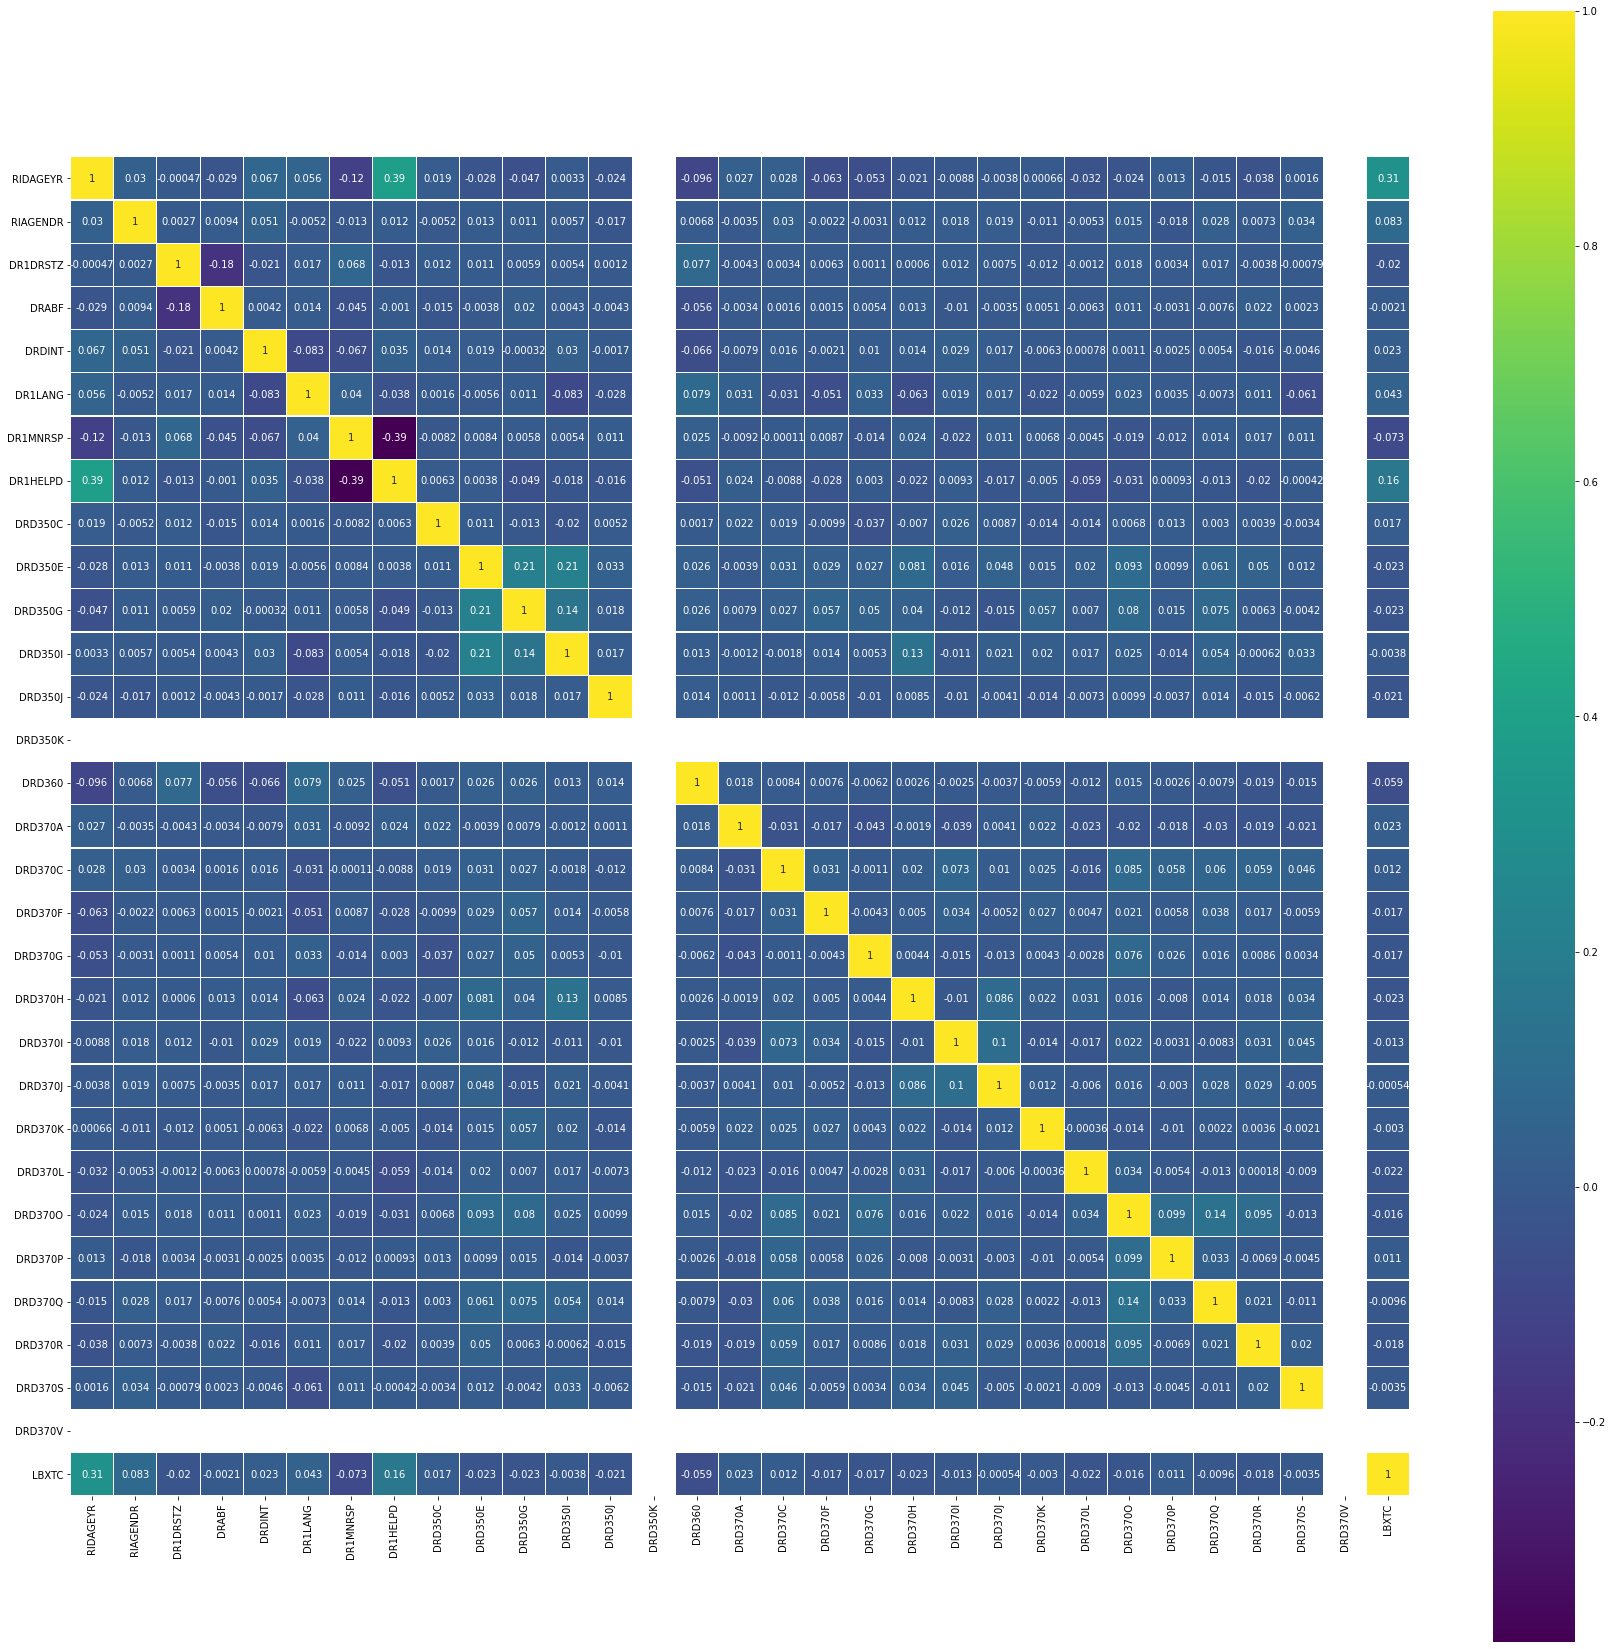

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
sns.heatmap(new_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [ ]:
new_data['SEQN'] = result1['SEQN']
new_data

,RIDAGEYR,RIAGENDR,DR1DRSTZ,DRABF,DRDINT,DR1LANG,DR1MNRSP,DR1HELPD,DRD350C,DRD350E,DRD350G,DRD350I,DRD350J,DRD350K,DRD360,DRD370A,DRD370C,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370V,LBXTC,SEQN
0,69,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,167.0,73557
1,54,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,170.0,73558
2,72,1,1,2.0,2.0,1.0,1.0,13.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.333333,2.0,2.0,2.0,2.0,2.0,2.0,2.0,126.0,73559
3,9,1,1,2.0,2.0,1.0,1.0,12.0,1.5,1.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.666667,2.0,2.0,2.0,2.0,2.0,2.0,2.0,168.0,73560
4,73,2,1,2.0,2.0,1.0,1.0,13.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,201.0,73561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,80,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,157.0,83724
7620,7,1,5,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,175.0,83725
7621,26,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,190.0,83727
7622,42,2,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,152.0,83729


intersection of columns from rfe and fs

In [ ]:
feat_columns=new_data
feat_columns.isna().sum

In [ ]:
#merging some more features from examination and questionnare 
feat_columns=pd.merge(feat_columns,exam, on='SEQN')
feat_columns=pd.merge(feat_columns,ques, on='SEQN')
feat_columns


In [ ]:
feat_columns.isna().num

In [ ]:
#dropped drd350 k and drd370v observing heatmap
feat_columns.drop('DRD350K',axis= 1, inplace=True)
feat_columns.drop('DRD370V', axis=1, inplace = True)
feat_columns

,RIDAGEYR,RIAGENDR,DR1DRSTZ,DRABF,DRDINT,DR1LANG,DR1MNRSP,DR1HELPD,DRD350C,DRD350E,DRD350G,DRD350I,DRD350J,DRD360,DRD370A,DRD370C,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,LBXTC,SEQN,BMXBMI,BMXWAIST,CDQ008,MCQ160D,SMQ020,DIQ010
0,69,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,167.0,73557,26.7,100.00,2.0,2.0,1.0,1.0
1,54,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,170.0,73558,28.6,107.60,2.0,2.0,1.0,1.0
2,72,1,1,2.0,2.0,1.0,1.0,13.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.333333,2.0,2.0,2.0,2.0,2.0,2.0,126.0,73559,28.9,109.20,2.0,2.0,1.0,1.0
3,9,1,1,2.0,2.0,1.0,1.0,12.0,1.5,1.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.666667,2.0,2.0,2.0,2.0,2.0,2.0,168.0,73560,17.1,61.00,2.0,2.0,1.5,2.0
4,73,2,1,2.0,2.0,1.0,1.0,13.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,201.0,73561,19.7,92.05,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,80,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,157.0,83724,24.9,92.30,2.0,2.0,1.0,2.0
7620,7,1,5,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,175.0,83725,16.2,53.30,2.0,2.0,1.5,2.0
7621,26,1,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,190.0,83727,24.5,87.10,2.0,2.0,2.0,2.0
7622,42,2,1,2.0,2.0,1.0,1.0,13.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,152.0,83729,34.0,102.70,2.0,2.0,2.0,2.0


In [ ]:
feat_columns.to_csv('features.csv')

In [ ]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( feat_columns, title = "Download CSV file", filename = "features.csv"):
    csv = feat_columns.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(feat_columns)